# Learning objectives

- Advanced pandas
    - merging, concatting dataframes
    - str.get_dummies()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Data wrangling

## Load data

In [3]:
data_folder = 'C:/Users/Graham West/Python Notebooks/Meharry Teaching/Datasets/'

df_titles  = pd.read_csv(data_folder + "IMDB/title_basics.tsv", sep="\t")
df_ratings = pd.read_csv(data_folder + "IMDB/title_ratings.tsv", sep="\t")

C:\Users\Graham West\AppData\Local\Temp\ipykernel_17484\1020686137.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_titles  = pd.read_csv(data_folder + "IMDB/title_basics.tsv", sep="\t")


In [8]:
df_titles.info()
print()
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9764099 entries, 0 to 9764098
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   isAdult         object
 4   startYear       object
 5   runtimeMinutes  object
 6   genres          object
dtypes: object(7)
memory usage: 521.5+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299500 entries, 0 to 1299499
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1299500 non-null  object 
 1   averageRating  1299500 non-null  float64
 2   numVotes       1299500 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 29.7+ MB


## Keep useful columns

In [5]:
df_titles = df_titles[ ['tconst','titleType','primaryTitle','isAdult','startYear','runtimeMinutes','genres'] ]

## Replace nans with correct flag

In [9]:
df_titles  = df_titles.replace('\\N',np.nan)
df_ratings = df_ratings.replace('\\N',np.nan)

## Filter and clean df_titles

In [10]:
df_titles.isAdult = df_titles.isAdult.astype(float)
df_titles.startYear = df_titles.startYear.astype(float)

def fix(x):
    try:
        return float(x)
    except:
        return np.nan
    # end
# end

df_titles.runtimeMinutes = df_titles.runtimeMinutes.apply(fix)

In [11]:
df_titles = df_titles[ df_titles.titleType=='movie' ]
df_titles = df_titles[ df_titles.isAdult==0 ]
df_titles = df_titles.drop(columns=['titleType','isAdult'])

## Merge the dataframes

In [40]:
df = df_titles.merge( df_ratings, on='tconst' )

# Optional: save RAM, don't have duplicates after merging
#del df_titles, df_ratings

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285591 entries, 0 to 285590
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          285591 non-null  object 
 1   primaryTitle    285591 non-null  object 
 2   startYear       285543 non-null  float64
 3   runtimeMinutes  258105 non-null  float64
 4   genres          275690 non-null  object 
 5   averageRating   285591 non-null  float64
 6   numVotes        285591 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 15.3+ MB


## Get genre dummies

In [42]:
df.genres

0                            Romance
1             Documentary,News,Sport
2                                NaN
3         Action,Adventure,Biography
4                              Drama
                     ...            
285586                      Thriller
285587                 Drama,History
285588         Adventure,History,War
285589                         Drama
285590                           NaN
Name: genres, Length: 285591, dtype: object

In [43]:
df_genres = df.genres.str.get_dummies(sep=',')
df_genres

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
285587,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
285588,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
285589,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
genres = df_genres.columns.to_list()
genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [45]:
df = pd.concat([df, df_genres], axis=1)
df = df.drop(columns=['genres'])
df.head()

,tconst,primaryTitle,startYear,runtimeMinutes,averageRating,numVotes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0000009,Miss Jerry,1894.0,45.0,5.3,205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,tt0000147,The Corbett-Fitzsimmons Fight,1897.0,100.0,5.3,468,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,tt0000502,Bohemios,1905.0,100.0,4.1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0000574,The Story of the Kelly Gang,1906.0,70.0,6.0,824,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0000591,The Prodigal Son,1907.0,90.0,4.4,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Analyze

## Plot number of films of each genre per year

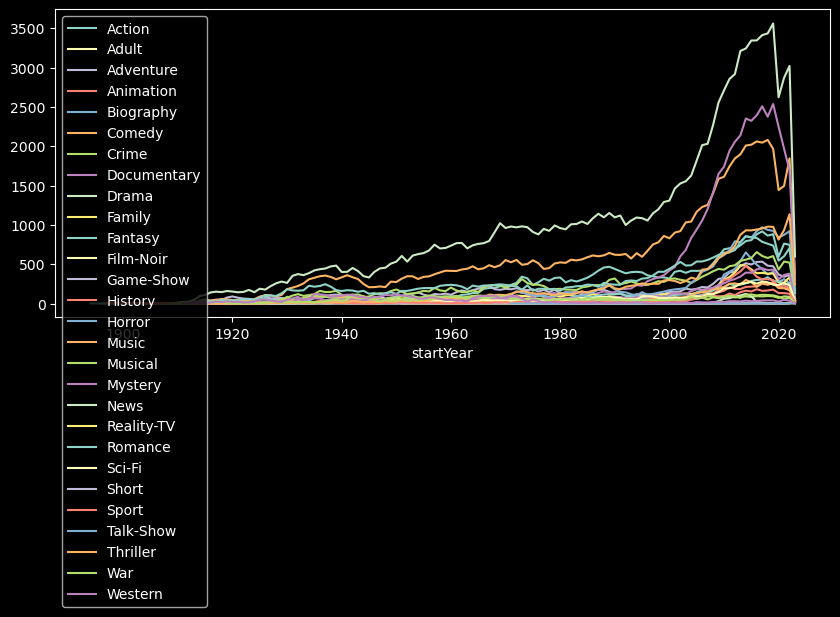

In [47]:
plt.figure(figsize=(10,4))

for g in genres:
    df[ df[g]==1 ].drop_duplicates(subset='primaryTitle').groupby('startYear')['startYear'].count().plot(label=g)
# end
plt.legend()

## Get average rating for each genre

In [51]:
for g in genres:
    df_sub = df[ df[g]==1 ]
    print(f"{g}: {df_sub.averageRating.mean()}")
# end

Action: 5.716434837719737
Adult: 4.791428571428571
Adventure: 5.869679911699779
Animation: 6.375139888089529
Biography: 6.965767773568085
Comedy: 5.91815048660254
Crime: 5.994550190342617
Documentary: 7.236468632033075
Drama: 6.26068208271902
Family: 6.2166755745590585
Fantasy: 5.901485263402181
Film-Noir: 6.46844494892168
Game-Show: 8.9
History: 6.817202432667245
Horror: 5.010575719649562
Music: 6.720069875776397
Musical: 6.1804532577903695
Mystery: 5.861188082948474
News: 7.240275650842266
Reality-TV: 6.559183673469387
Romance: 6.10340923191463
Sci-Fi: 5.328059350668429
Short: 6.873684210526317
Sport: 6.62578634173987
Talk-Show: 6.538461538461537
Thriller: 5.605828704087554
War: 6.417007588254701
Western: 5.829760727704172


## Get most voted movie per genre

In [53]:
for g in genres:
    df_sub = df[ df[g]==1 ]
    idx = df_sub.numVotes.idxmax()
    print(f"{g}: {df_sub.primaryTitle[idx]}")
# end

Action: The Dark Knight
Adult: Showgirls
Adventure: Inception
Animation: WALL·E
Biography: The Wolf of Wall Street
Comedy: The Wolf of Wall Street
Crime: The Dark Knight
Documentary: Bowling for Columbine
Drama: The Shawshank Redemption
Family: WALL·E
Fantasy: Star Wars: Episode IV - A New Hope
Film-Noir: Sunset Blvd.
Game-Show: Wait Wait Don't Tell Me Live!
History: Schindler's List
Horror: The Shining
Music: Whiplash
Musical: Sweeney Todd: The Demon Barber of Fleet Street
Mystery: Se7en
News: An Inconvenient Truth
Reality-TV: Let's Be Evil
Romance: Forrest Gump
Sci-Fi: Inception
Short: Sleeping Dogs Lie
Sport: Million Dollar Baby
Talk-Show: Ali & Cavett: The Tale of the Tapes
Thriller: The Dark Knight Rises
War: Inglourious Basterds
Western: Django Unchained
